## Introduction

This Project provides an exploratory data analysis (EDA) of a car models dataset. The goal is to understand the structure of the data,clean the data, identify patterns, and extract insights using statistical analysis and visualizations.

### Importing Required Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [16]:
df=pd.read_csv("E:\Adnan\Python Project\Cars\car_prediction_dataset.csv")

### Basic Structure of dataset

In [219]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


### Dataset Overview

In [235]:
print(f"Dataset rows: {df.shape[0]}\nDataset columns: {df.shape[1]}")

Dataset rows: 8128
Dataset columns: 12


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [236]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,3.981875,497.017504,35.343246,0.946450
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.418783,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [65]:
print(f"This dataset spans cars from {df['year'].min()}-{df['year'].max()}")

This dataset spans cars from 1983-2020


In [66]:
df['name'].value_counts().head(1)

name
Maruti Swift Dzire VDI    129
Name: count, dtype: int64

### Maruti Swift Dzire VDI dominates with 129 listings

## Missing Value Analysis

In [67]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [70]:
# Percentage of missing values per column
round((df.isnull().mean() * 100),2)

name                  0.00
year                  0.00
selling_price         0.00
km_driven             0.00
fuel                  0.00
seller_type           0.00
transmission          0.00
owner                 0.00
mileage(km/ltr/kg)    2.72
engine                2.72
max_power             2.65
seats                 2.72
dtype: float64

#### Handling missing/Null values

In [158]:
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['max_power']=df['max_power'].fillna(df['max_power'].mean())
df['mileage(km/ltr/kg)']=df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())
df['engine']=df['engine'].fillna(df['engine'].mean())
df['seats']=df['seats'].fillna(df['seats'].mean())

In [94]:
df.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

#### Null values handled. Data ready for visualisation

#### Price vs Year

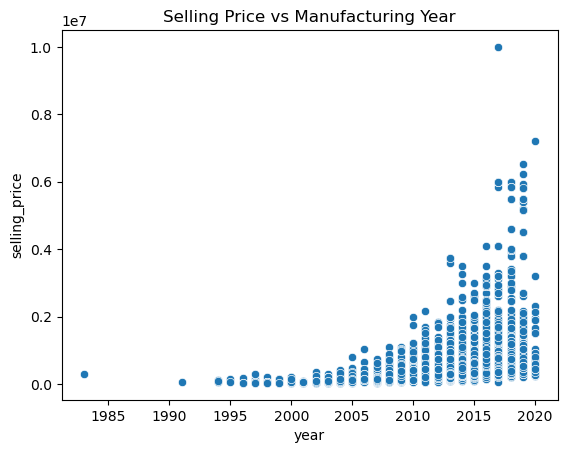

In [220]:
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs Manufacturing Year')
plt.show()

###### Insights:
Age is primary Value driver.
Newer cars sell for higher prices(dense clustering).



#### Average Price by Fuel Type

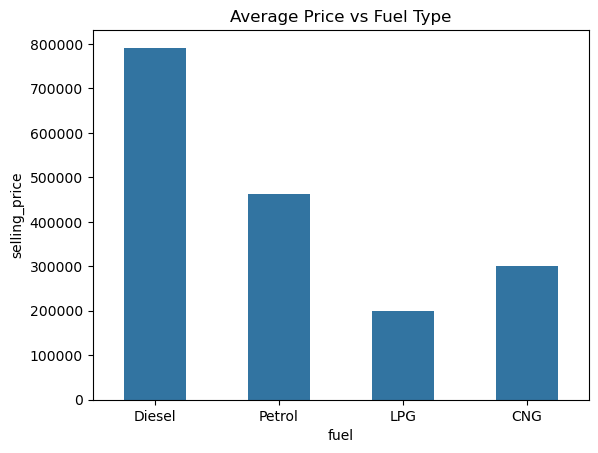

In [190]:
sns.barplot(x='fuel', y='selling_price', data=df, estimator=np.mean, width=0.50, errorbar=None)
plt.title('Average Price vs Fuel Type')
plt.show()

Diesel averages 7.91L,
Petrol 4.62L
CNG 3.01L and
LPG at 2.00L.

##### Transmission Type vs Price

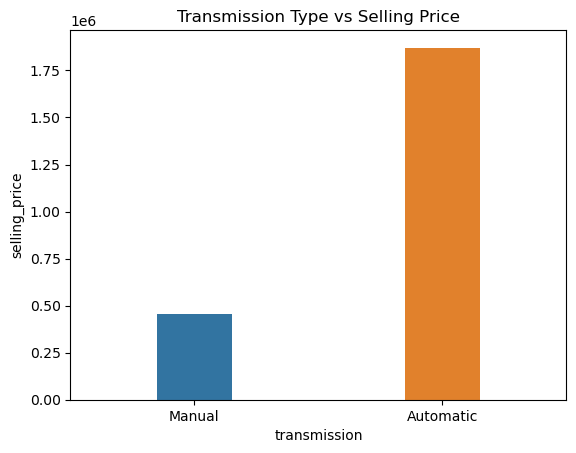

In [206]:
sns.barplot(x='transmission', y='selling_price', estimator=np.mean, data=df, width=0.3, errorbar=None, hue='transmission')
plt.title('Transmission Type vs Selling Price')
plt.show()

###### Automatic transmission at 1.8L
###### Manual Transmission at 0.45L


#### Selling Price vs Kilometers Driven

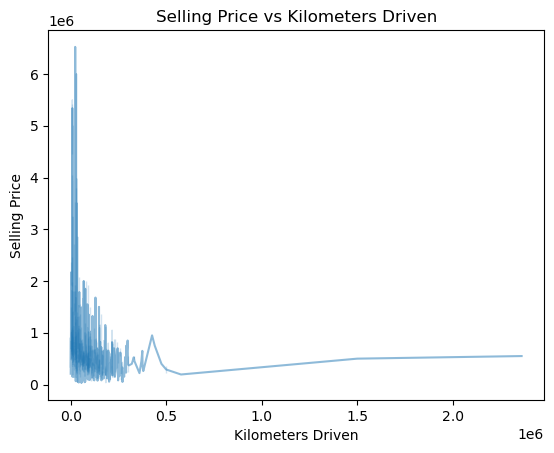

In [173]:
sns.lineplot(x='km_driven', y='selling_price', data=df, alpha=0.5)
plt.title('Selling Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

###### Selling price and kilometers driven are inversely proportional

#### Selling Price by Owner Type

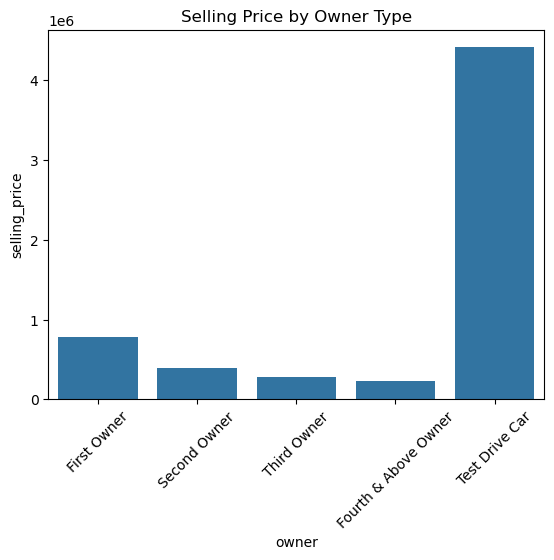

In [188]:
sns.barplot(x='owner', y='selling_price', data=df, errorbar=None)
plt.title('Selling Price by Owner Type')
plt.xticks(rotation=45)
plt.show()

#### Transmission vs Fuel Type Count

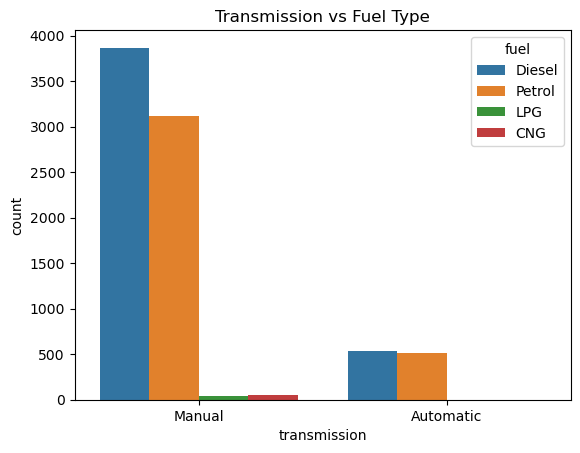

In [228]:
sns.countplot(x='transmission', hue='fuel', data=df)
plt.title('Transmission vs Fuel Type')
plt.show()

#### Sale based on Fuel Type

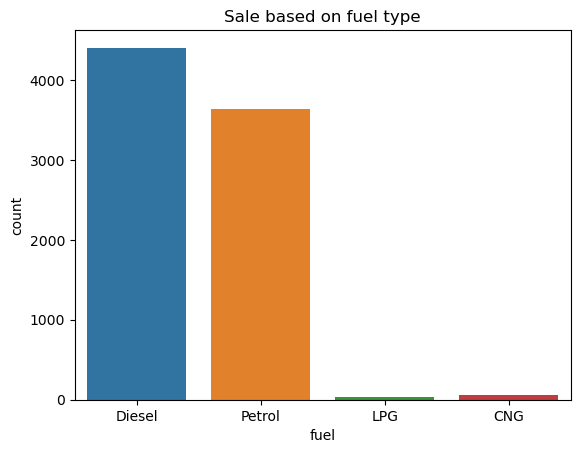

In [237]:
sns.countplot(x='fuel', data=df, hue='fuel')
plt.title('Sale based on fuel type')
plt.show()

## -------------------------------------------------------------------------------------------------------------

#### Key Insights

Newer cars tend to have significantly higher selling prices.

Diesel cars generally command higher prices compared to petrol cars.

Automatic transmission vehicles are priced higher on average.

Kilometer-driven has a negative relationship with selling price.

Diesel cars are in high demand than others.

## -------------------------------------------------------------------------------------------------------------